# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

# Load the dataset

In [2]:
df = pd.read_csv('ETH-USD_weekly_return_volatility.csv')
df.head()

,Year,Week_Number,mean_return,volatility,label
0,2017,45,-0.528333,5.966071,NaN
1,2017,46,1.477000,3.277433,NaN
2,2017,47,4.435143,6.128955,NaN
3,2017,48,0.016429,4.824342,NaN
4,2017,49,0.379857,4.076044,NaN


In [3]:
df_main = pd.read_csv('ETH-USD.csv')
df_main[df_main['Year'] == 2021].head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
1149,2021-01-01,2021,1,1,Friday,0,2021-00,737.71,749.20,719.79,730.37,13652004358,730.37,-0.010078,668.870000,589.3344
1150,2021-01-02,2021,1,2,Saturday,0,2021-00,730.40,786.80,718.11,774.53,19740771179,774.53,0.060473,677.100714,595.3324
1151,2021-01-03,2021,1,3,Sunday,1,2021-01,774.51,1006.57,771.56,975.51,45200463368,975.51,0.259475,701.187857,605.6396
1152,2021-01-04,2021,1,4,Monday,1,2021-01,977.06,1153.19,912.31,1040.23,56945985763,1040.23,0.066350,731.931429,617.4930
1153,2021-01-05,2021,1,5,Tuesday,1,2021-01,1041.50,1129.37,986.81,1100.01,41535932781,1100.01,0.057461,765.157143,630.2944


## Method to Calculate the accuracy

In [4]:
def compute_accuracy(classifier, X, y):
  y_predicted = classifier.predict(X)
  confusion_matrix = pd.crosstab(y, 
                                 y_predicted
                                 )
  accuracy = (np.diag(confusion_matrix).sum() / confusion_matrix.to_numpy().sum()).round(3)

  return accuracy

# Design a knn classifier based on labels of year 2020

In [5]:
Y_col = 'label'
X_cols = df.loc[:, df.columns != Y_col].columns

X_train = df[df['Year'] == 2020][X_cols]
y_train = df[df['Year'] == 2020][Y_col]
X_test = df[df['Year'] == 2021][X_cols]
y_test = df[df['Year'] == 2021][Y_col]

def knn_classifier(X, y, k):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X, y)
  
  return classifier

k_values = [3, 5, 7, 9, 11]
accuracies = []
for k in k_values:
  classifier = knn_classifier(X_train, y_train, k)
  accuracy = compute_accuracy(classifier, X_train, y_train)
  accuracies.append(accuracy)

print(accuracies)

[0.83, 0.811, 0.792, 0.679, 0.623]


## Plot accuracies vs. k

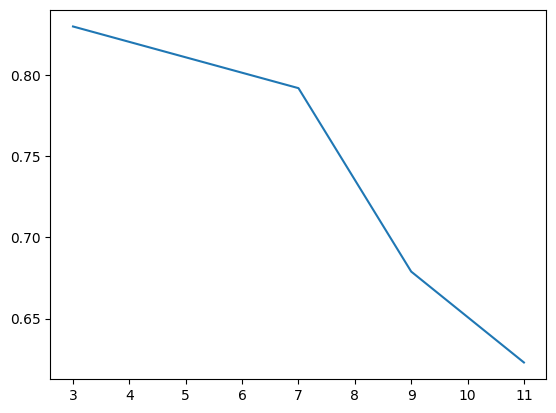

In [6]:
plt.plot(k_values, accuracies)
plt.show()

Optimal value for k for year 1 is k=3

## Predict year 2 using optimal k=3

In [11]:
classifier = knn_classifier(X_train, y_train, 3)
accuracy = compute_accuracy(classifier, X_test, y_test)
print(f"the accuracy of year 2 for k=3 is {accuracy}")

the accuracy of year 2 for k=3 is 0.509


Predicted  green  red
Actual               
green         17   13
red           13   10


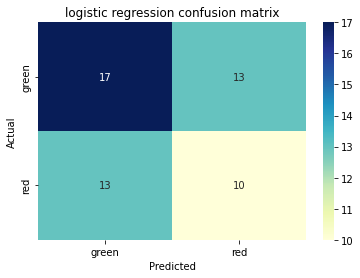

In [12]:
fig, ax = plt.subplots()
y_predicted = classifier.predict(X_test)
confusion_matrix = pd.crosstab(y_test, 
                               y_predicted, 
                               rownames=['Actual'],
                               colnames=['Predicted']
                               )
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, ax=ax, cmap="YlGnBu")
ax.set_title('logistic regression confusion matrix')
plt.show()

In [ ]:
accuracy = (np.diag(confusion_matrix).sum() / confusion_matrix.to_numpy().sum()).round(2)
print(f"accuracy = {accuracy}")
TN = confusion_matrix['red']['red']
TP = confusion_matrix['green']['green']
FP = confusion_matrix['red']['green']
FN = confusion_matrix['green']['red']
print(f"TP = {TP}, TN = {TN}, FP = {FP}, FN = {FN}")
TPR = (TP / (TP + FN)).round(2)
TNR = (TN / (TN + FP)).round(2)
print(f"TPR = {TPR} and TNR = {TNR}")

accuracy = 0.58
TP = 25, TN = 6, FP = 5, FN = 17
TPR = 0.6 and TNR = 0.55
